In [ ]:
import zipfile
import os
!pip install einops

zip_path = 'cnn_dataset.zip'
extract_path = 'cnn_dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset unzipped successfully.")

Dataset unzipped successfully.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch
import torch.optim as optim
import torch.nn.functional as F
from scipy import stats
from torch.utils.data import DataLoader, TensorDataset, SubsetRandomSampler
import time
import os
import h5py
from torchsummary import summary
from torchvision import transforms
from torch.utils import data
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, precision_score, recall_score, f1_score
from torch.utils.data import ConcatDataset
from torch.utils.data import random_split
from sklearn.preprocessing import normalize
from torchvision import transforms, datasets
import torch.nn as nn
import random
from torchvision import models, transforms
from einops import rearrange

In [ ]:
dataset_path = 'cnn_dataset/cnn_dataset'
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

dataset = datasets.ImageFolder(root=dataset_path, transform=transform)


In [ ]:
num_classes = len(dataset.classes)
num_train = int(0.7 * len(dataset))
num_val = int(0.15 * len(dataset))
num_test = len(dataset) - num_train - num_val

train_dataset, val_dataset, test_dataset = random_split(dataset, lengths=[num_train, num_val, num_test],
                                                        generator=torch.Generator().manual_seed(7))
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

## Vision Transformer

Epoch:  1 Train Loss:  1.0741167780476137 Train Accuracy:  40.352380952380955 Val Loss:  1.1500831196005916 Val Accuracy:  34.0
Epoch:  2 Train Loss:  0.9369112961560397 Train Accuracy:  54.73809523809524 Val Loss:  0.7933848869632667 Val Accuracy:  63.93333333333333
Epoch:  3 Train Loss:  0.7305269606388811 Train Accuracy:  68.25714285714285 Val Loss:  0.694657391225788 Val Accuracy:  71.06666666666666
Epoch:  4 Train Loss:  0.6527565982204078 Train Accuracy:  72.33809523809524 Val Loss:  0.7892498306825128 Val Accuracy:  65.57777777777778
Epoch:  5 Train Loss:  0.6087792214108093 Train Accuracy:  74.54761904761905 Val Loss:  0.6481718458759953 Val Accuracy:  73.04444444444445
Epoch:  6 Train Loss:  0.577652811460582 Train Accuracy:  76.21428571428571 Val Loss:  0.5725092820718255 Val Accuracy:  76.28888888888889
Epoch:  7 Train Loss:  0.5586136695461795 Train Accuracy:  77.05238095238096 Val Loss:  0.649796487579883 Val Accuracy:  72.26666666666667
Epoch:  8 Train Loss:  0.5327196527

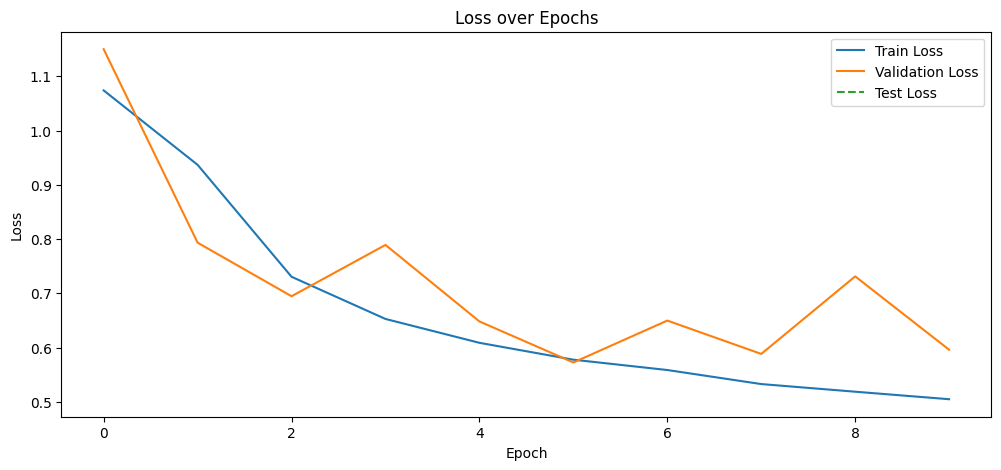

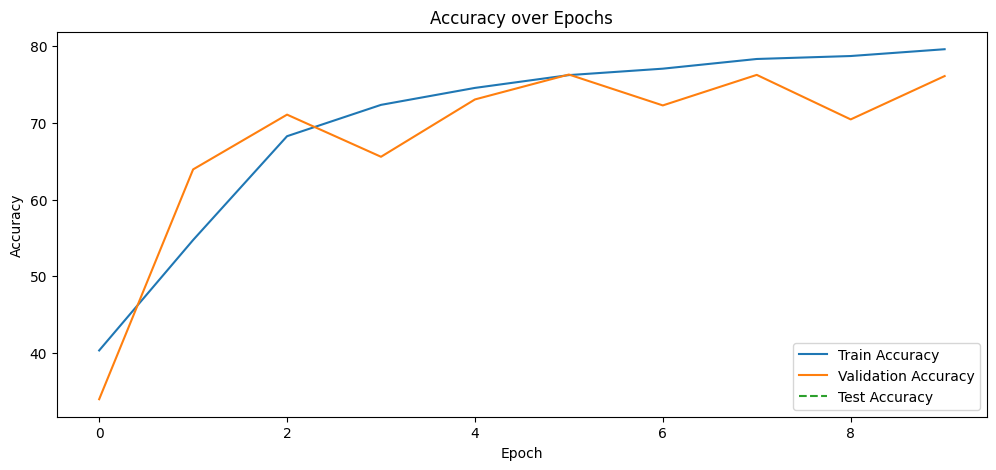

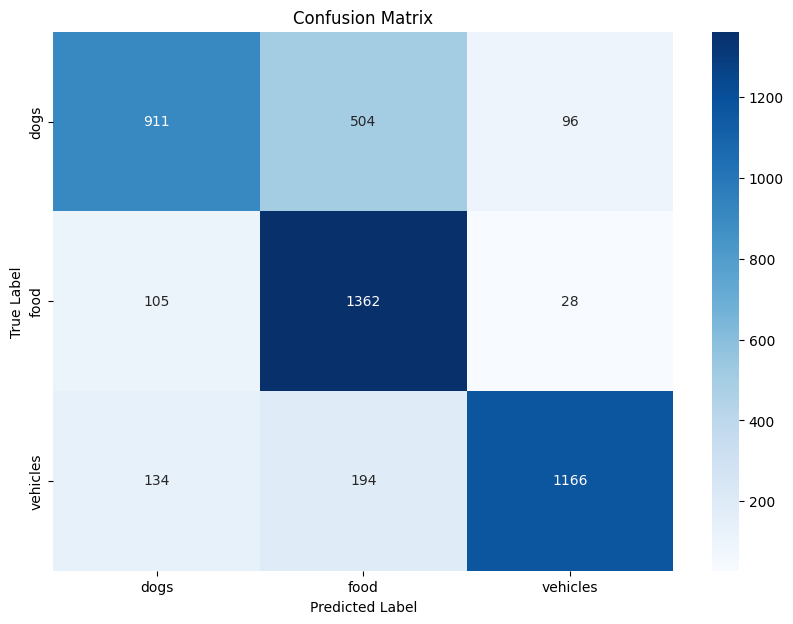

In [ ]:
#Functions
def train_test(train_loader,val_loader,test_loader):
  train_losses = []
  val_losses = []
  test_losses = []

  train_accuracies = []
  val_accuracies = []
  test_accuracies = []

  # Training and Validation Loop
  num_epochs = 10

  for epoch in range(num_epochs):
      model.train()
      running_loss = 0
      correct_train = 0
      total_train = 0

      for images, labels in train_loader:
          images, labels = images.to(device), labels.to(device)
          optimizer.zero_grad()
          outputs = model(images)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          running_loss += loss.item()
          _, predicted = torch.max(outputs.data, 1)
          total_train += labels.size(0)
          correct_train += (predicted == labels).sum().item()

      train_losses.append(running_loss / len(train_loader))
      train_accuracies.append(100 * correct_train / total_train)

      model.eval()
      val_loss = 0
      correct_val = 0
      total_val = 0

      with torch.no_grad():
          for images, labels in val_loader:
              images, labels = images.to(device), labels.to(device)
              outputs = model(images)
              loss = criterion(outputs, labels)
              val_loss += loss.item()
              _, predicted = torch.max(outputs.data, 1)
              total_val += labels.size(0)
              correct_val += (predicted == labels).sum().item()

      val_losses.append(val_loss / len(val_loader))
      val_accuracies.append(100 * correct_val / total_val)

      print('Epoch: ',epoch+1,'Train Loss: ', train_losses[-1], 'Train Accuracy: ', train_accuracies[-1], 'Val Loss: ', val_losses[-1], 'Val Accuracy: ', val_accuracies[-1])


  true_labels = []
  pred_labels = []
  model.eval()
  test_loss = 0
  correct_test = 0
  total_test = 0

  with torch.no_grad():
      for images, labels in test_loader:
          images, labels = images.to(device), labels.to(device)
          outputs = model(images)
          loss = criterion(outputs, labels)
          test_loss += loss.item()
          _, predicted = torch.max(outputs.data, 1)
          total_test += labels.size(0)
          correct_test += (predicted == labels).sum().item()
          true_labels.extend(labels.cpu().numpy())
          pred_labels.extend(predicted.cpu().numpy())

      test_losses.append(test_loss / len(test_loader))
      test_accuracies.append(100 * correct_test / total_test)

  avg_test_loss = test_loss / len(test_loader)
  precision = precision_score(true_labels, pred_labels, average='macro')
  recall = recall_score(true_labels, pred_labels, average='macro')
  f1 = f1_score(true_labels, pred_labels, average='macro')
  accuracy = accuracy_score(true_labels, pred_labels)
  print("Accuracy: ", accuracy * 100)
  print("Test Loss: ", avg_test_loss)
  print("Precision: ", precision*100)
  print("Recall: ", recall*100)
  print("F1 Score: ", f1*100)

  print('Test Loss: ',test_losses[-1], 'Test Accuracy: ',test_accuracies[-1])
  return train_losses,train_accuracies,val_losses,val_accuracies, test_losses,test_accuracies,true_labels,pred_labels

def plotting():
  # Plotting training, validation, and testing losses
  plt.figure(figsize=(12, 5))
  plt.plot(train_losses, label='Train Loss')
  plt.plot(val_losses, label='Validation Loss')
  plt.plot(test_losses, label='Test Loss', linestyle='--')
  plt.title('Loss over Epochs')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  plt.figure(figsize=(12, 5))
  plt.plot(train_accuracies, label='Train Accuracy')
  plt.plot(val_accuracies, label='Validation Accuracy')
  plt.plot(test_accuracies, label='Test Accuracy', linestyle='--')
  plt.title('Accuracy over Epochs')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

  cm = confusion_matrix(true_labels, pred_labels)
  plt.figure(figsize=(10, 7))
  sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=dataset.classes, yticklabels=dataset.classes)
  plt.title('Confusion Matrix')
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class ViT(nn.Module):
    def __init__(self, n_classes):
        super(ViT, self).__init__()
        self.img_sz = 64
        self.p_sz = 8
        self.dim = 256
        self.depth = 10
        self.heads = 8
        self.mlp_dim = 512
        self.ch = 3

        self.n_patches = (self.img_sz // self.p_sz) ** 2
        p_dim = self.ch * (self.p_sz ** 2)

        self.patch_embed = nn.Linear(p_dim, self.dim)
        self.pos_embed = nn.Parameter(torch.randn(1, self.n_patches + 1, self.dim))
        self.cls_token = nn.Parameter(torch.randn(1, 1, self.dim))
        enc_layer = nn.TransformerEncoderLayer(
            d_model=self.dim,
            nhead=self.heads,
            dim_feedforward=self.mlp_dim,
            activation='gelu'
        )
        self.transformer = nn.TransformerEncoder(enc_layer, num_layers=self.depth)
        self.class_head = nn.Sequential(
            nn.Linear(self.dim, self.mlp_dim),
            nn.GELU(),
            nn.Linear(self.mlp_dim, n_classes)
        )

    def forward(self, x):
        b, ch, _, _ = x.size()
        x = x.unfold(2, self.p_sz, self.p_sz).unfold(3, self.p_sz, self.p_sz).contiguous().view(b, -1, ch * self.p_sz ** 2)
        x = self.patch_embed(x)
        cls_t = self.cls_token.expand(b, -1, -1)
        x = torch.cat((cls_t, x), dim=1)
        b, n, _ = x.shape
        pos = self.pos_embed.expand(b, -1, -1)
        x += pos
        x = x.permute(1, 0, 2)
        x = self.transformer(x)
        x = self.class_head(x[0])
        return x

model = ViT(3).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
train_losses,train_accuracies,val_losses,val_accuracies, test_losses,test_accuracies,true_labels, pred_labels=train_test(train_loader,val_loader,test_loader)
plotting()